## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:

def build_mlp(input_shape, output_units = 10, num_neurons = [512,256,128],drop_ratio = 0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.Dropout(drop_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = keras.layers.Dropout(drop_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [out] )
    return model

In [6]:
"""Code Here
設定超參數
"""
EPOCHS = 50
BATCH_SIZE = 256
LEARNING_RATE = 1e-3
MOMENTUM = 0.95
DROP_RATIO = 0.25

In [17]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape = x_train.shape[1:],drop_ratio = DROP_RATIO)
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train,y_train,
          epochs = EPOCHS,
         batch_size = BATCH_SIZE,
          validation_data = (x_test,y_test),
          shuffle = True)
train_loss = model.history.history['loss']
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0   

Text(0.5, 1.0, 'Accuracy')

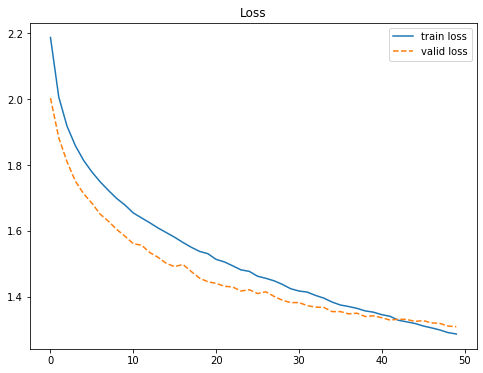

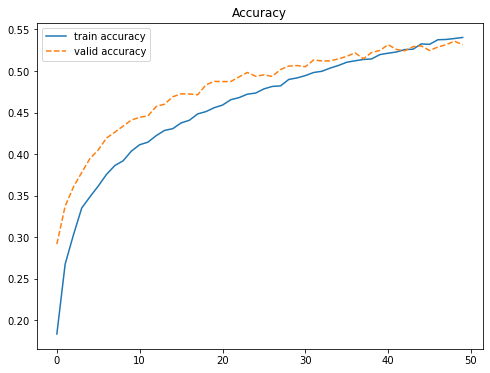

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.figure(figsize = (8,6))
plt.plot(range(len(train_loss)),train_loss,'-',label = 'train loss')
plt.plot(range(len(valid_loss)),valid_loss, '--', label = 'valid loss')
plt.legend()
plt.title('Loss')

plt.figure(figsize = (8,6))
plt.plot(range(len(train_acc)),train_acc,'-',label = 'train accuracy')
plt.plot(range(len(valid_acc)),valid_acc, '--', label = 'valid accuracy')
plt.legend()
plt.title('Accuracy')

In [20]:
model1 = build_mlp(input_shape = x_train.shape[1:],drop_ratio = DROP_RATIO)
model1.summary()
optimizer1 = keras.optimizers.Adam(lr=LEARNING_RATE)
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer1)
model1.fit(x_train,y_train,
          epochs = EPOCHS,
         batch_size = BATCH_SIZE,
          validation_data = (x_test,y_test),
          shuffle = True)
train_loss1 = model.history.history['loss']
valid_loss1 = model.history.history["val_loss"]
train_acc1 = model.history.history["accuracy"]
valid_acc1 = model.history.history["val_accuracy"]

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0   

Text(0.5, 1.0, 'Accuracy (Adam)')

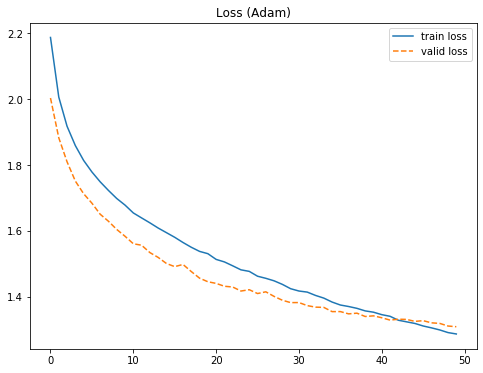

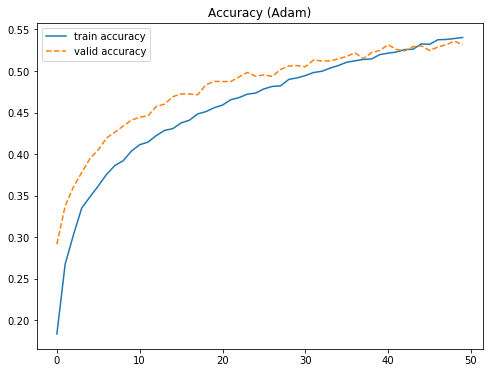

In [22]:
plt.figure(figsize = (8,6))
plt.plot(range(len(train_loss1)),train_loss1,'-',label = 'train loss')
plt.plot(range(len(valid_loss1)),valid_loss1, '--', label = 'valid loss')
plt.legend()
plt.title('Loss (Adam)')

plt.figure(figsize = (8,6))
plt.plot(range(len(train_acc1)),train_acc1,'-',label = 'train accuracy')
plt.plot(range(len(valid_acc1)),valid_acc1, '--', label = 'valid accuracy')
plt.legend()
plt.title('Accuracy (Adam)')